## [Luis Alejandro Rodr√≠guez Arenas](https://luigitoby.github.io/)
## Cod. 202321287
# Taller 3

# Librer√≠as

In [1]:
from sympy import symbols, Matrix, pi, cos, sin, simplify, eye, solve, latex, atan2, pprint, init_printing, Derivative, sqrt, diff, Eq, tan
from sympy.physics.vector import dynamicsymbols, init_vprinting, ReferenceFrame
from numpy import deg2rad, linspace
import matplotlib.pyplot as plt
init_vprinting(use_latex='mathjax')

# Sobre diagramas y procesos
Para todos los puntos de asjunta un archivo .pdf con diagramas y procesos a fines, para mayor claridad del proceso que se llevo acabo en cada ejercicio.

# Ejercicio 1 Sistema Manivela-rodillo-punzonador
Se tiene que la manivela OA gira con theta = 60deg
se tiene theta_dot = 4 rad/s
se tiene theta_dot_dot = 8 rad/s^2

y necesitamos encontrar la aceleraci√≥n en el eje vertical de B

In [2]:
# variables
t = symbols("t")
theta = dynamicsymbols("theta")

# Par√°metros
OA = 0.08 # m, tama√±o eslabon OA
r = 0.02 # m, esta es el radio del rodillo

# Posici√≥n de A
x_A= OA*cos(theta)
y_A= OA*sin(theta)

# Posici√≥n de B
y_B = y_A + r

# Derivadas respecto al tiempo
y_B_dot = diff(y_B, t)
y_B_ddot = diff(y_B_dot, t)

# Sustituir condiciones del problema
# theta = 60¬∞ en radianes
theta_val = deg2rad(120)
theta_dot_val = -4.0
theta_ddot_val = -8.0

# Usamos sympy para sustituir
subs_dict = {
    theta: theta_val,
    diff(theta, t): theta_dot_val,
    diff(theta, t, 2): theta_ddot_val
}

vB = float(y_B_dot.subs(subs_dict))
aB = float(y_B_ddot.subs(subs_dict))
print("Velocidad del eje B =", vB, "m/s")
print("Aceleraci√≥n del eje B =", aB, "m/s^2")

Velocidad del eje B = 0.15999999999999992 m/s
Aceleraci√≥n del eje B = -0.7885125168440819 m/s^2


## Verificaci√≥n con otros valores comparando a resultado en internet [Ejercicio en chegg](https://www.chegg.com/homework-help/questions-and-answers/determine-acceleration-ab-positive-negative-shaft-b-52-crank-oa-angular-acceleration-81-ra-q8564181)

In [3]:
# variables
t = symbols("t")
theta = dynamicsymbols("theta")

# Par√°metros
OA = 0.079 # m, tama√±o eslabon OA
r = 0.022 # m, esta es el radio del rodillo

# Posici√≥n de A
x_A= OA*cos(theta)
y_A= OA*sin(theta)

# Posici√≥n de B
y_B = y_A + r

# Derivadas respecto al tiempo
y_B_dot = diff(y_B, t)
y_B_ddot = diff(y_B_dot, t)

# Sustituir condiciones del problema
# theta = 60¬∞ en radianes
theta_val = deg2rad(-52+180)
theta_dot_val = -3.9
theta_ddot_val = -8.1

# Usamos sympy para sustituir
subs_dict = {
    theta: theta_val,
    diff(theta, t): theta_dot_val,
    diff(theta, t, 2): theta_ddot_val
}

vB = float(y_B_dot.subs(subs_dict))
aB = float(y_B_ddot.subs(subs_dict))
print("Velocidad del eje B =", vB, "m/s")
print("Aceleraci√≥n del eje B =", aB, "m/s^2")

Velocidad del eje B = 0.1896853005478353 m/s
Aceleraci√≥n del eje B = -0.5529040633654123 m/s^2


## An√°lisis
Las magnitudes obtenidas tienen sentido, pues por l√≥gica vemos que el mecanismo va a empezar a bajar de nuevo cuando el rodillo llegue a su m√°xima altura, y por esot la aceleraci√≥n tiene que ir disminuyendo, sin embargo vemos que la velocidad en el eje B es positiva, pues esta yendo en direcci√≥n positiva arriba.
## Plot extra
Dejo un plot extra que hice con [ChatGPT5](https://chatgpt.com) para ilustrar el movimiento del mecanismo

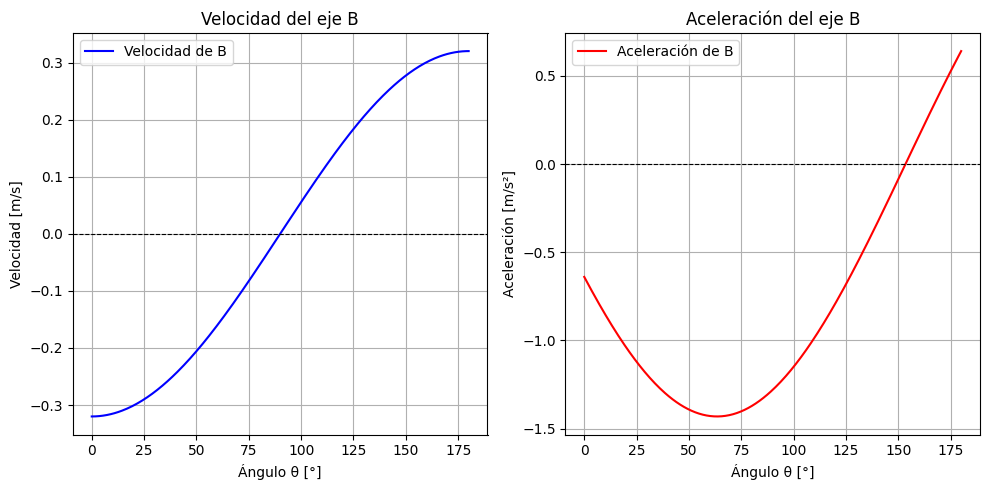

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, cos, sin, pi, diff, lambdify
from sympy.physics.mechanics import dynamicsymbols

# Variables simb√≥licas
t = symbols("t")
theta = dynamicsymbols("theta")

# Par√°metros del mecanismo
OA = 0.08  # m
r = 0.02   # m

# Posici√≥n de A
x_A = OA*cos(theta)
y_A = OA*sin(theta)

# Posici√≥n de B
y_B = y_A + r

# Derivadas simb√≥licas
y_B_dot = diff(y_B, t)       # velocidad
y_B_ddot = diff(y_B_dot, t)  # aceleraci√≥n

# Expresiones lambdify (parametrizamos por theta, theta_dot y theta_ddot)
vB_fun = lambdify([theta, diff(theta,t)], y_B_dot, "numpy")
aB_fun = lambdify([theta, diff(theta,t), diff(theta,t,2)], y_B_ddot, "numpy")

# Valores de velocidad angular y aceleraci√≥n angular constantes
theta_dot_val = -4.0   # rad/s
theta_ddot_val = -8.0  # rad/s^2

# Rango de √°ngulos (0 a 180¬∞ en radianes)
theta_vals = np.linspace(0, np.pi, 300)

# Evaluamos velocidad y aceleraci√≥n en ese rango
v_vals = vB_fun(theta_vals, theta_dot_val)
a_vals = aB_fun(theta_vals, theta_dot_val, theta_ddot_val)

# Gr√°ficas
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(np.degrees(theta_vals), v_vals, label="Velocidad de B", color="blue")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.xlabel("√Ångulo Œ∏ [¬∞]")
plt.ylabel("Velocidad [m/s]")
plt.title("Velocidad del eje B")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(np.degrees(theta_vals), a_vals, label="Aceleraci√≥n de B", color="red")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.xlabel("√Ångulo Œ∏ [¬∞]")
plt.ylabel("Aceleraci√≥n [m/s¬≤]")
plt.title("Aceleraci√≥n del eje B")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Ejercicio 2 Slider
Este es un ejercicio t√≠pico, y se puede derivar de hecho una relaci√≥n geom√©trica simple para relacionar el movimiento en eje x con el √°ngulo theta, sin embargo la derivaci√≥n de la misma es algo compleja (Esto lo vimos en la clase complementar√≠a).

Por esto mismo en cambio vamos a encontrar un camino de vectores que sumen 0, y a partir de aqu√≠ con una restricci√≥n podemos despejar el vector OC que es el que buscamos.

In [5]:
t = dynamicsymbols._t # tiempo can√≥nico de SymPy mechanics, no se porque no quer√≠a funcionar hasta que no agregara esto
b = symbols('b', real=True)
theta,x = dynamicsymbols('theta x')

N = ReferenceFrame('N')                     
i, j = N.x, N.y

# (a) POSICI√ìN MEDIANTE VECTORES

r_OB = b*cos(theta)*i + b*sin(theta)*j

# Deslizador C
r_OC = x*i

# Barra 2: BC
r_BC = r_OC - r_OB

# Restricci√≥n: |BC| = b, es decir que este tiene que tener longitud b
constraint_eq = (r_BC.dot(r_BC) - b**2).simplify()
# Nota. Cuando hacemos producto punto con si mismo sacamos |BC|**2, por eso le restamos b para que la condici√≥n quede igual a 0
print("CConstraints:")
display(constraint_eq)
# Resolviendo para x
sols_x = solve(constraint_eq, x)
x_expr = sols_x[-1]   
# Vectores expl√≠citos
    
r_OC_explicit = x_expr*i
r_BC_explicit = r_OC_explicit - r_OB

print("\n (a) POSICI√ìN")
print("\n Vector OB")

display(r_OB)
print("\n Vector BC")
display(r_BC_explicit.simplify())

print("\n Vector OC")
display(r_OC_explicit)

print("\n Posici√≥n slider")
display(x_expr)           

# (b) VELOCIDAD DEL DESLIZADOR C

# Derivar 
xdot = diff(x_expr, t).simplify()
display(xdot)

print("\n (b) VELOCIDAD")
display(xdot)      # Velocidad en x

# (c) ACELERACI√ìN DEL DESLIZADOR C

# Derivar nuevamente para obtener la aceleraci√≥n
xddot = diff(xdot, t).simplify()

print("\n (c) ACELERACI√ìN")
display(xddot)      # Aceleraci√≥n escalar

CConstraints:


(-2‚ãÖb‚ãÖcos(Œ∏) + x)‚ãÖx


 (a) POSICI√ìN

 Vector OB


b‚ãÖcos(Œ∏) n_x + b‚ãÖsin(Œ∏) n_y


 Vector BC


b‚ãÖcos(Œ∏) n_x + -b‚ãÖsin(Œ∏) n_y


 Vector OC


2‚ãÖb‚ãÖcos(Œ∏) n_x


 Posici√≥n slider


2‚ãÖb‚ãÖcos(Œ∏)

-2‚ãÖb‚ãÖsin(Œ∏)‚ãÖŒ∏Ãá


 (b) VELOCIDAD


-2‚ãÖb‚ãÖsin(Œ∏)‚ãÖŒ∏Ãá


 (c) ACELERACI√ìN


     ‚éõ                   2‚éû
-2‚ãÖb‚ãÖ‚éùsin(Œ∏)‚ãÖŒ∏Ãà + cos(Œ∏)‚ãÖŒ∏Ãá ‚é†

## An√°lisis
El resultado tiene sentido si consideramos las magnitudes y signos de la velocidad, pues estos son negativos cuando el √°ngulo es positivo (Note que si el √°ngulo crece nos movemos de hecho para la izquierda)
## Plot extra
Dejo un plot extra que hice con [ChatGPT5](https://chatgpt.com) para ilustrar el movimiento del mecanismo

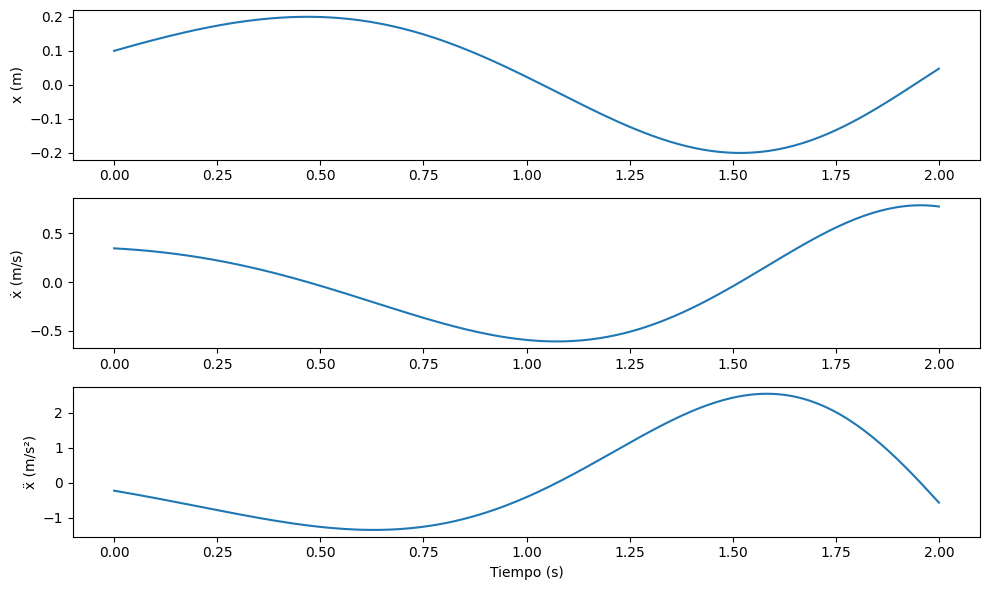

In [6]:
# Ejemplo num√©rico

# Par√°metros
b_val = 0.1   # longitud en m
theta0 = pi/3 # rad (60¬∞)
omega = -2.0  # rad/s
alpha = -1.0  # rad/s¬≤

# Definimos la trayectoria de theta(t)
def theta_t(tt): return float(theta0 + omega*tt + 0.5*alpha*tt**2)
def theta_dot_t(tt): return float(omega + alpha*tt)
def theta_ddot_t(tt): return float(alpha)

# Rango de tiempo
tt_vals = linspace(0, 2, 200)

# C√°lculos
x_vals = [2*b_val*cos(theta_t(tt)) for tt in tt_vals]
x_dot_vals = [-2*b_val*sin(theta_t(tt))*theta_dot_t(tt) for tt in tt_vals]
x_ddot_vals = [-2*b_val*cos(theta_t(tt))*theta_dot_t(tt)**2 - 2*b_val*sin(theta_t(tt))*theta_ddot_t(tt) for tt in tt_vals]

# Graficamos
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.plot(tt_vals, x_vals)
plt.ylabel("x (m)")

plt.subplot(3,1,2)
plt.plot(tt_vals, x_dot_vals)
plt.ylabel("·∫ã (m/s)")

plt.subplot(3,1,3)
plt.plot(tt_vals, x_ddot_vals)
plt.ylabel("·∫ç (m/s¬≤)")
plt.xlabel("Tiempo (s)")

plt.tight_layout()
plt.show()

# Ejercicio 3 Para el sistema en el que pin ancla al collar deslizante A con la barra OB, dar expresiones que describan las variables ùë¶Ãà del collar A en t√©rminos de ùúÉ (ùë¶ ùë†ùë¢ùë† ùëëùëíùëüùëñùë£ùëéùëëùëéùë† ùúÉÃá ùë¶ ùúÉÃà ).

In [7]:
theta = dynamicsymbols('theta')
R = symbols('R')
b = symbols('b')


A_y = b*tan(theta)
print("Expresion para la posicisi√≥n en terminos de A_y")
display(A_y)
print("\nA_y en t√©rminos de R y theta:")

A_y_R = A_y.subs(b, R*cos(theta)).simplify()

display(A_y_R)


# luego las derivadas son

A_y_dot = diff(A_y, t).simplify()
A_y_ddot = diff(A_y_dot, t).simplify()
A_y_dot_R = diff(A_y_R, t).simplify()
A_y_ddot_R = diff(A_y_dot_R, t).simplify()


# Mostrar resultados
print("Velocidad de y en A")
display(A_y_dot)

print("\n Aceleraci√≥n de y en A:")
display(A_y_ddot)

# Sustituyendo en t√©rminos de R y Œ∏ para velocidad
print("\nVelocidad de y en A (con R y Œ∏):")
display(A_y_dot_R)

# Sustituyendo en t√©rminos de R y Œ∏ para aceleraci√≥n
print("\nAceleraci√≥n de y en A (con R y Œ∏):")
display(A_y_ddot_R)



Expresion para la posicisi√≥n en terminos de A_y


b‚ãÖtan(Œ∏)


A_y en t√©rminos de R y theta:


R‚ãÖsin(Œ∏)

Velocidad de y en A


  b‚ãÖŒ∏Ãá  
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   2   
cos (Œ∏)


 Aceleraci√≥n de y en A:


  ‚éõ          2           ‚éû
b‚ãÖ‚éù2‚ãÖsin(Œ∏)‚ãÖŒ∏Ãá  + cos(Œ∏)‚ãÖŒ∏Ãà‚é†
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
            3             
         cos (Œ∏)          


Velocidad de y en A (con R y Œ∏):


R‚ãÖcos(Œ∏)‚ãÖŒ∏Ãá


Aceleraci√≥n de y en A (con R y Œ∏):


  ‚éõ          2           ‚éû
R‚ãÖ‚éù- sin(Œ∏)‚ãÖŒ∏Ãá  + cos(Œ∏)‚ãÖŒ∏Ãà‚é†

## An√°lisis
El ejercicio aunque tiene varias juntas es f√°cil de simplificar si uno aprovecha la geometr√≠a del ejercicio. Personalmente para mi tiene m√°s sentido encontrar las variables en terminos de b, pero [vi en internet](https://www.chegg.com/homework-help/questions-and-answers/pin-attached-sliding-collar-engages-slot-bar-ob--determine-speed-y-terms-theta-theta-b-acc-q194549937) que varios resultados los dejan en termino de R, por lo que ofrezco ambas formas, que son equivalentes.

# Ejercicio 4
# Problema Robocol, charla de Juan Pablo Santa
## Introducci√≥n
* Boya sonogr√°fica
* Debe cambiar su densidad y estar varios d√≠as en el mar
* Puede sumergirse casi 1k bajo elmar
* Mide salinidad y otras cosas
* Compoetencia de submarino
* Esta boya es uno de los requisitos que deben cumplit.
### Profiling Float
Esta solo debe cambiar su densidad, bajar x cantidad de metros, tomar datos y subir.
## Requerimientos 
* Debe tener un desenso de 2.5 metros
* Estar 2.5m bajo el agua por 45s
* Regresar a la superficie
* Trasmitir datos
* Repetir al menos dos veces
* \rho = masa/volumen
* La estrategia es cambiar la masa, pero Juan cambia el volumen
* Elastomero que debe ser capaz de resistir la salinidad y el volumen
## Tarea
* Debemos caracterizar cuantas vueltas debe dar la varilla para saber cuanto volumen vamos a generar, la idea es obtener una gr√°fica con el n√∫mero de vueltas y el volumen obtenido.

## Aproach inicial
Inicialmente se modela de forma b√°sica el movimiento mediante la relaci√≥n trigonom√©trica que hay entre los brazos y el r√°dio, que resulta se puede modelar por medio de pytagoras, relaciones trigonometricas o un ciclo de vectores con suma 0. Inicialmente intente hacerlo de manera geom√©trica pero teniendo en cuenta √∫nicamente el crecimiento del r√°dio y simplificando el problema de tal forma que no se tuviera en cuenta la geometr√≠a del flotador

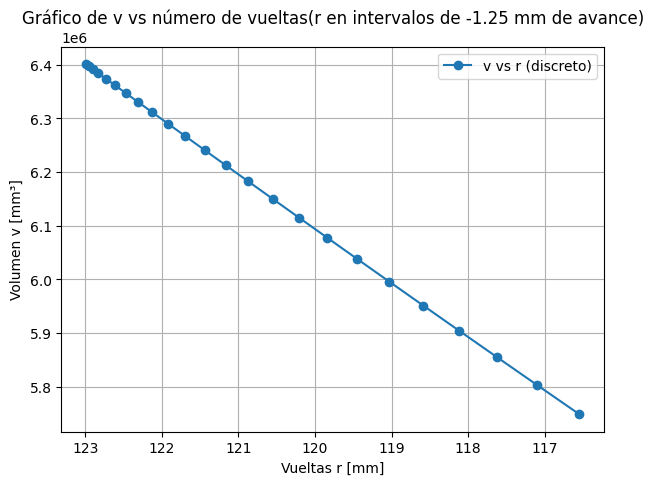

In [8]:
# Par√°metros simb√≥licos
l, h_c = symbols('l h_c') 
# Donde l es la longitud de los eslabones 
# h_c es la altura de la pieza, espec√≠ficamente la altura de nuestro cilindro

# Definimos par√°metros fijos de ejemplo
l_val = 73   # mm
h_c_val = 134.7  # mm

# Definimos funci√≥n de r(t) y v(r)
def r_t(t, l_val):
    return (((l_val)**2 - (t)**2)**0.5) + 50

def v_r(r, h_c_val):
    return pi*r**2*h_c_val

# Intervalos en pasos de 1.25 mm
t_values = np.arange(30, 0, -1.25)  # por ejemplo hasta 100 mm
r_values = r_t(t_values, l_val)
v_values = v_r(r_values, h_c_val)

# Graficar
plt.figure(figsize=(7,5))
plt.plot(r_values, v_values, marker='o', label="v vs r (discreto)")
plt.gca().invert_xaxis()
plt.xlabel("Vueltas r [mm]")
plt.ylabel("Volumen v [mm¬≥]")
plt.title("Gr√°fico de v vs n√∫mero de vueltas(r en intervalos de -1.25 mm de avance)")
plt.grid(True)
plt.legend()
plt.show()


## C√≥digo final con consideraciones de geometr√≠a
Una vez se tuvo un resultado sensible, con sentido (se sab√≠a desde un inicio que la relaci√≥n deb√≠a ser cuadr√°tica, pues el volumen depende seg√∫n el cuadrado del r√°dio), pero ahora tenemos que agregar m√°s sentido geom√©trico con ayuda del CAD y las diferentes restrucciones f√≠sicas de obtenemos.

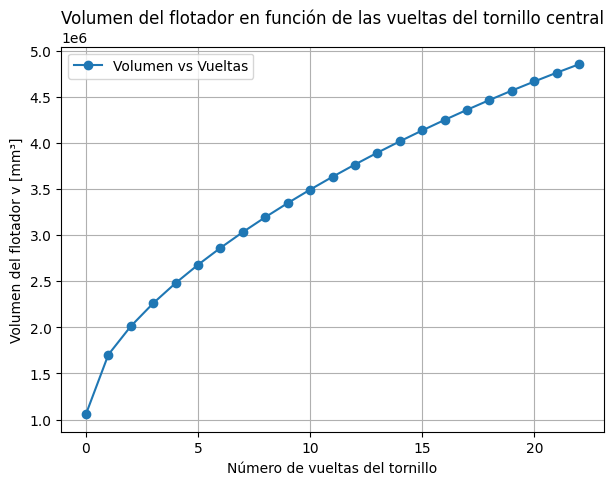

In [ ]:
# Par√°metros simb√≥licos
l, h_c = symbols('l h_c')

# Par√°metros geom√©tricos y de ensamble
l_val = 73        # [mm] longitud del eslab√≥n
h_c_val = 134.7   # [mm] altura del flotador cil√≠ndrico

r_min = 50        # [mm] radio m√≠nimo del flotador (posici√≥n cerrada)
avance_vuelta = 1.25  # [mm/vuelta] paso del tornillo
t_max = 27.0      # [mm] desplazamiento m√°ximo del tornillo (posici√≥n abierta)
t_min = 0         # [mm] desplazamiento m√≠nimo del tornillo (posici√≥n cerrada)

# Relaci√≥n entre desplazamiento t y radio r
def r_t(t, l_val, r_min):
    return np.sqrt(2*l_val*t - t**2) + r_min

# Volumen del flotador (cilindro de radio r y altura h_c)
def v_r(r, h_c_val):
    return pi * r**2 * h_c_val

# Discretizaci√≥n del movimiento
t_values = np.arange(t_min, t_max + avance_vuelta, avance_vuelta)

# N√∫mero de vueltas correspondientes
vueltas = (t_values - t_min) / avance_vuelta

# C√°lculo de radios y vol√∫menes
r_values = r_t(t_values, l_val, r_min)
v_values = v_r(r_values, h_c_val)

# Gr√°fica Volumen vs Vueltas
plt.figure(figsize=(7,5))
plt.plot(vueltas, v_values, marker='o', label="Volumen vs Vueltas")
plt.xlabel("N√∫mero de vueltas del tornillo")
plt.ylabel("Volumen del flotador v [mm¬≥]")
plt.title("Volumen del flotador en funci√≥n de las vueltas del tornillo central")
plt.grid(True)
plt.legend()
plt.show()

## An√°lisis
Podemos ver al final que a medida que aumentan el n√∫mero de vueltas, es decir se reduce el tama√±o del tornillo, va a ir aumentando el radio del mecanismo con forme con una relaci√≥n cuadr√°tica muy marcada, aqu√≠ podemos ver cual va a ser la diferencia de volumen obtenida, adem√°s que a medida que aumentamos las vueltas, este crece r√°pidamente y al final los incrementos empiezan a ser cada vez m√°s peque√±os, como es de esperar de una relaci√≥n de este tipo
## Consideraciones para el dise√±o
Hay que evaluar si esta diferencia de vol√∫men si podra permitir al flotador desender la altura requerida por la competencia. Si esto resulta ser v√°lido, considero que es un buen aproach pues este mecanismo parece ser robusto y probablemente pueda cumplir varios ciclos de funcionamiento (Muchos m√°s que los dos requeridos por la competencia.)